# Titanic Dataset 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
clean_data = {'Sex': {'male' : 0 , 'female' : 1},
              'Embarked':{"C":0,"S":1,"Q":2}
             }
df.replace(clean_data,inplace=True)

In [6]:
df.shape

(891, 12)

# EDA (Exploratory Data Analysis)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


0    577
1    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtyp

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
dtype: object

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

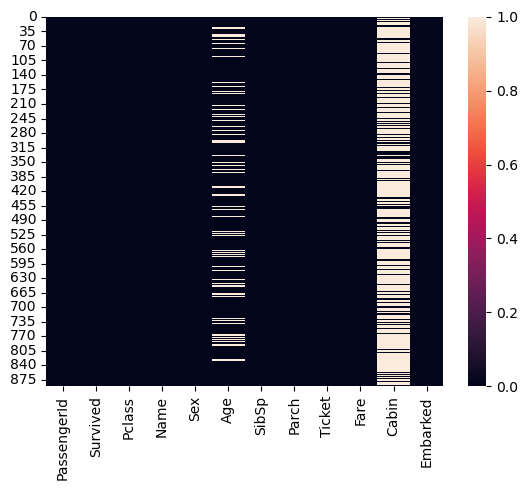

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.897638
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.515181
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [14]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


# Visualization

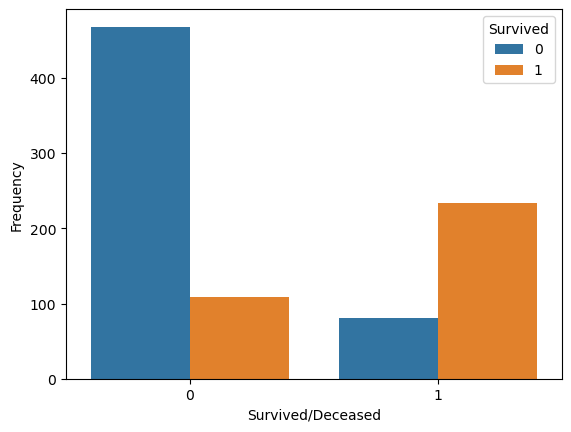

In [16]:
sns.countplot(x='Sex',data=df,hue='Survived')
plt.ylabel("Frequency")
plt.xlabel("Survived/Deceased")
plt.show()

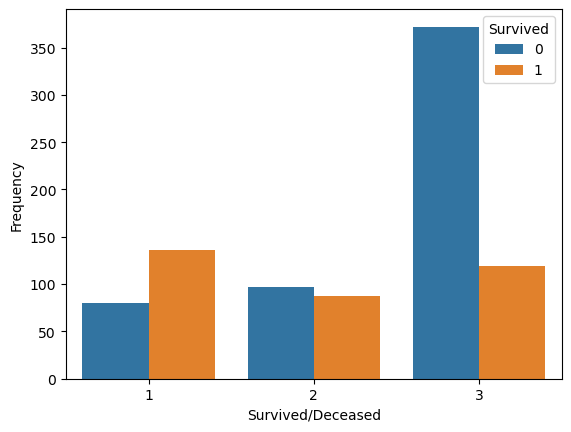

In [17]:
sns.countplot(x='Pclass',data=df,hue='Survived')
plt.ylabel("Frequency")
plt.xlabel("Survived/Deceased")
plt.show()

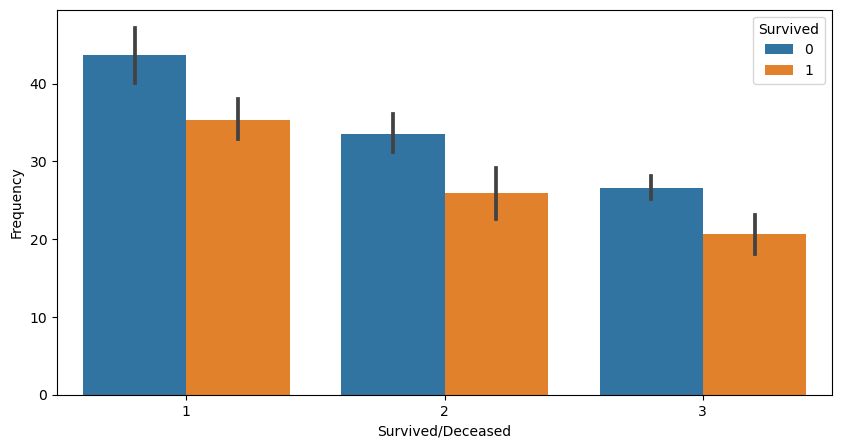

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Pclass',y='Age',data=df,hue='Survived')
plt.ylabel("Frequency")
plt.xlabel("Survived/Deceased")

plt.show()

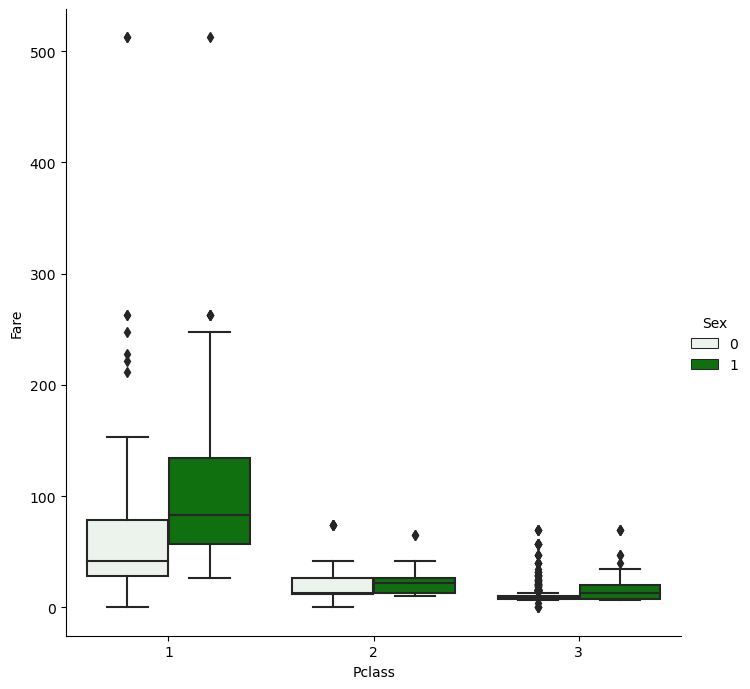

In [19]:
sns.catplot(data=df, x="Pclass", y="Fare", hue="Sex", kind="box",height=7,color='green')

In [20]:
df = df.drop(['Name','Ticket','Cabin','Age'],axis=1)
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,1.0
1,2,1,1,1,1,0,71.2833,0.0
2,3,1,3,1,0,0,7.9250,1.0
3,4,1,1,1,1,0,53.1000,1.0
4,5,0,3,0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,13.0000,1.0
887,888,1,1,1,0,0,30.0000,1.0
888,889,0,3,1,1,2,23.4500,1.0
889,890,1,1,0,0,0,30.0000,0.0


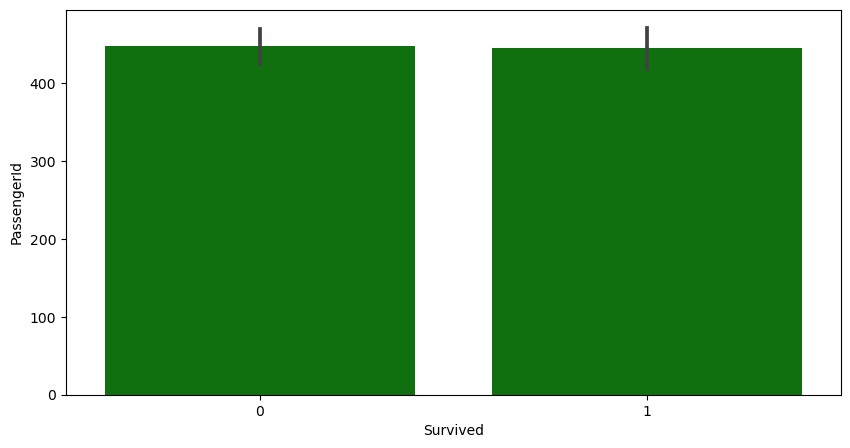

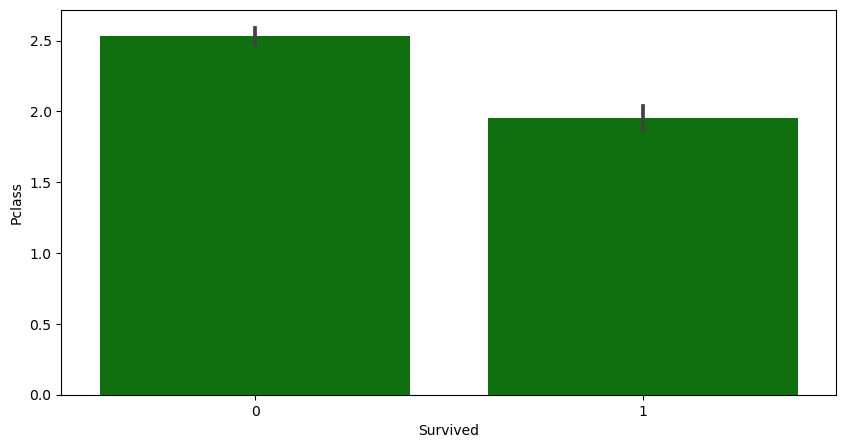

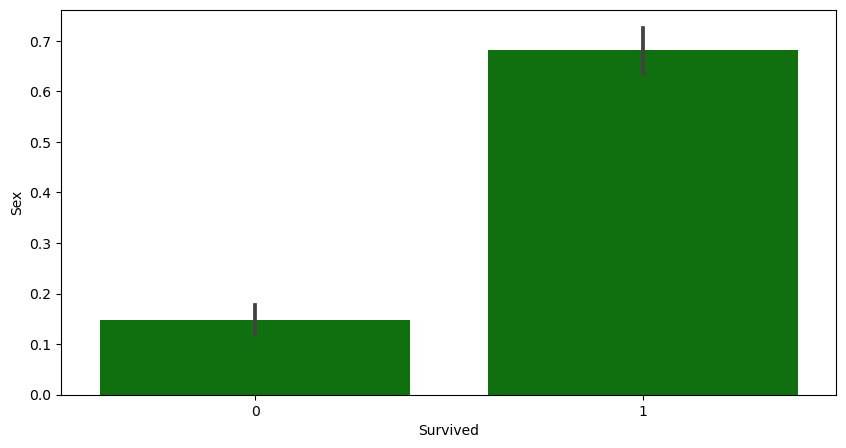

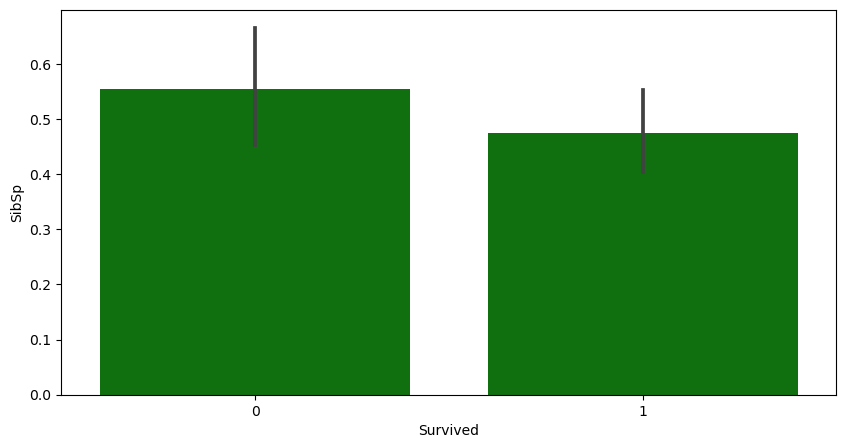

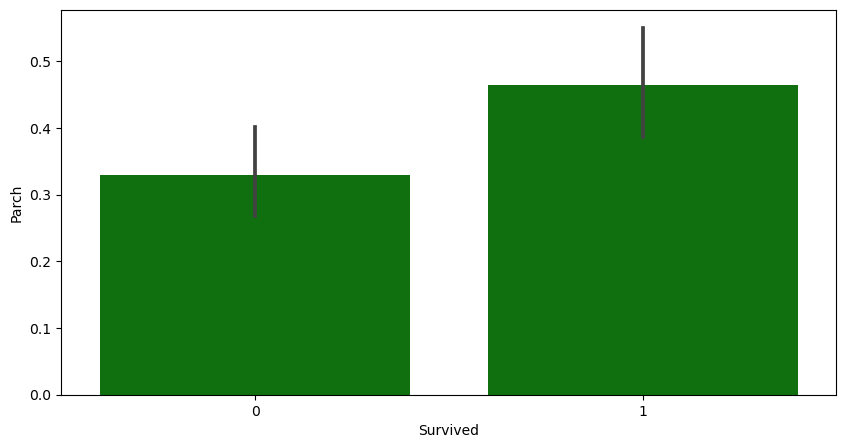

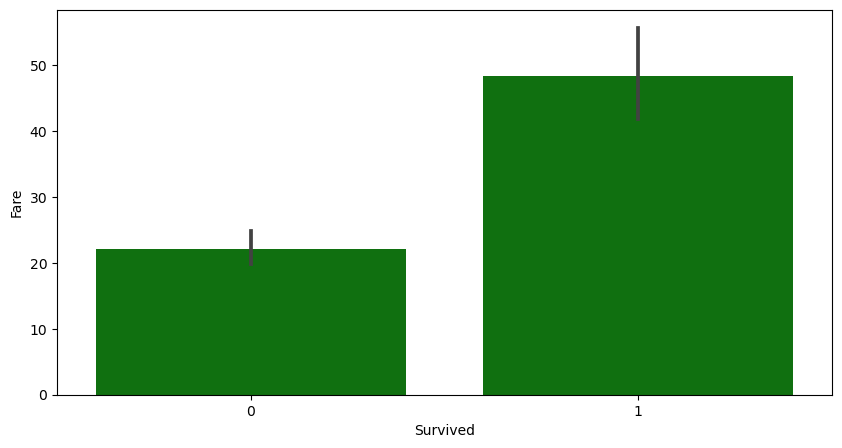

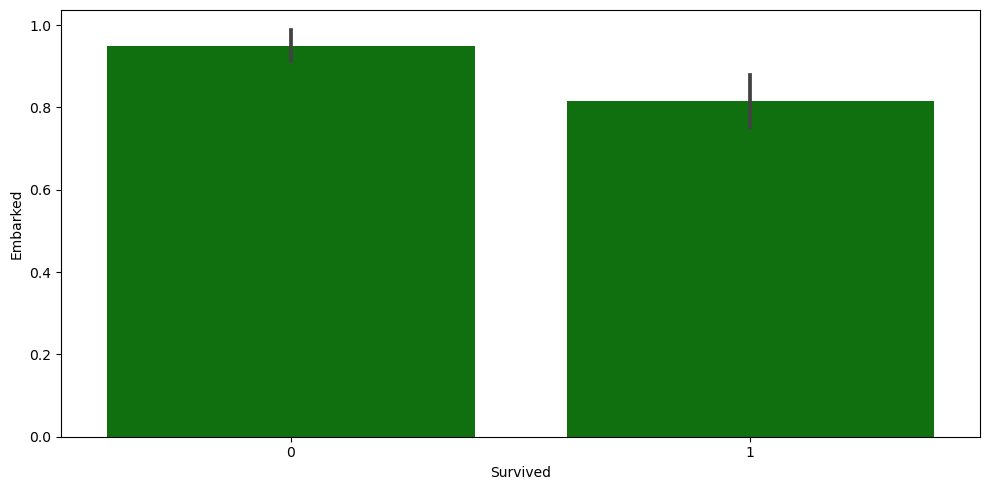

In [21]:
index=0
labels = df['Survived']
features = df.drop('Survived', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="green")
plt.tight_layout()
plt.show()

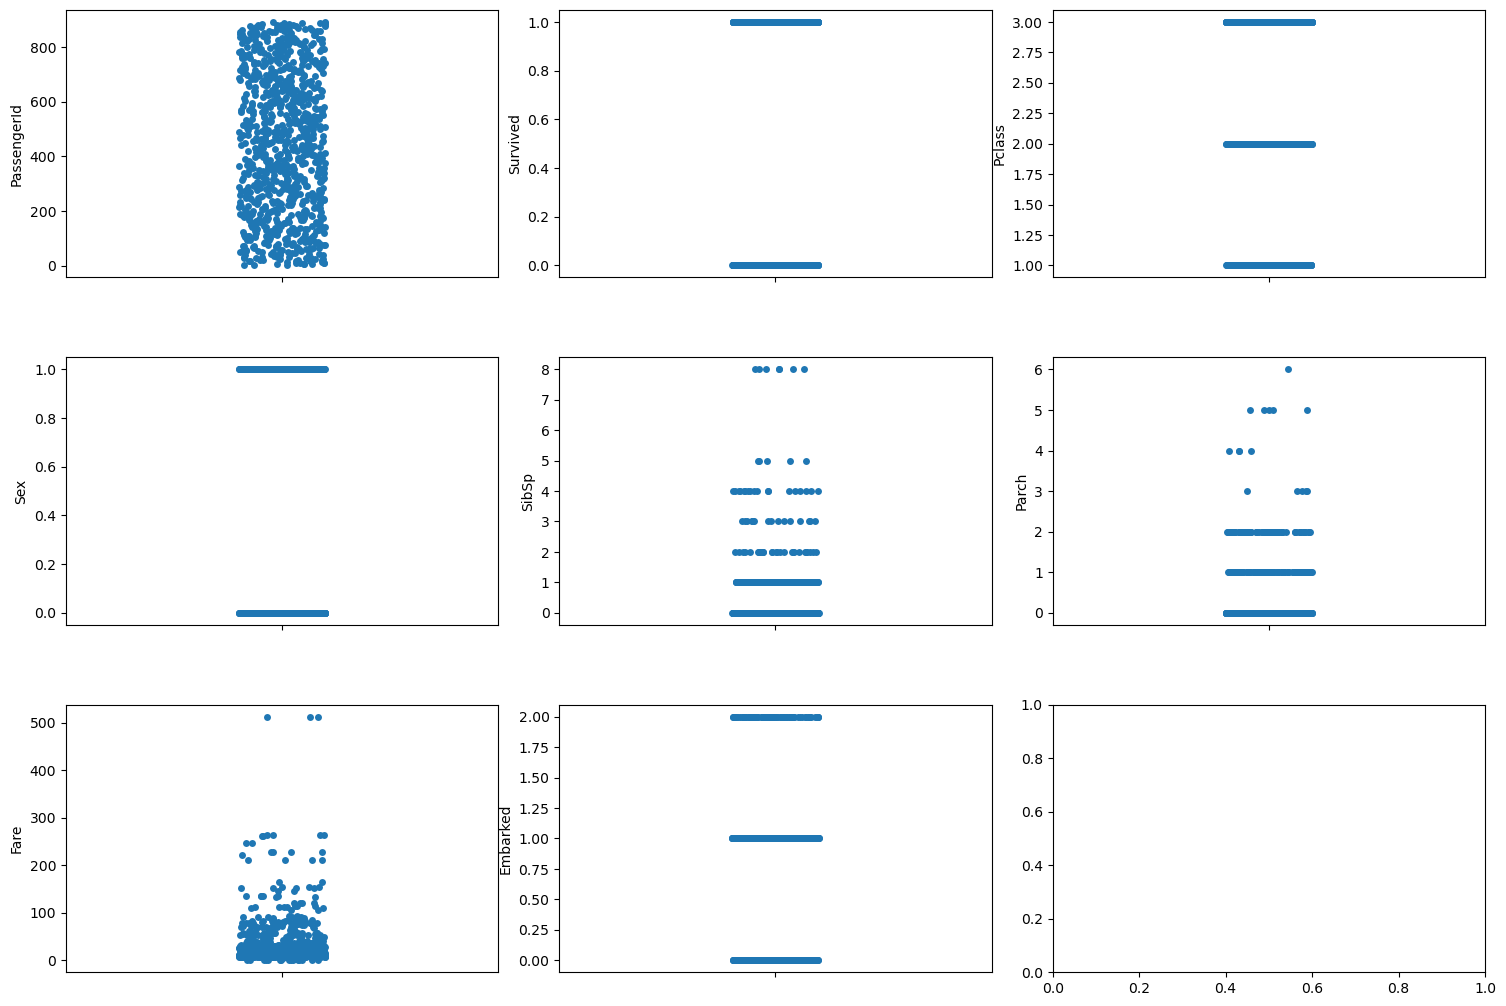

In [22]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.stripplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [23]:
df.shape


(891, 8)

In [24]:
data = df.copy()
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,1.0
1,2,1,1,1,1,0,71.2833,0.0
2,3,1,3,1,0,0,7.9250,1.0
3,4,1,1,1,1,0,53.1000,1.0
4,5,0,3,0,0,0,8.0500,1.0


In [25]:
Bmi = data.Survived
Bmi = Bmi.values.reshape(-1,1)
data['Survived'] = StandardScaler().fit_transform(Bmi)
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,-0.789272,3,0,1,0,7.2500,1.0
1,2,1.266990,1,1,1,0,71.2833,0.0
2,3,1.266990,3,1,0,0,7.9250,1.0
3,4,1.266990,1,1,1,0,53.1000,1.0
4,5,-0.789272,3,0,0,0,8.0500,1.0


In [26]:
Age = data.Embarked
Age = Age.values.reshape(-1,1)
data['Embarked'] = StandardScaler().fit_transform(Age)
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,-0.789272,3,0,1,0,7.2500,0.198804
1,2,1.266990,1,1,1,0,71.2833,-1.743356
2,3,1.266990,3,1,0,0,7.9250,0.198804
3,4,1.266990,1,1,1,0,53.1000,0.198804
4,5,-0.789272,3,0,0,0,8.0500,0.198804


In [27]:
Charges = data.PassengerId
Charges = Charges.values.reshape(-1,1)
data['PassengerId'] = StandardScaler().fit_transform(Charges)
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,-1.730108,-0.789272,3,0,1,0,7.2500,0.198804
1,-1.726220,1.266990,1,1,1,0,71.2833,-1.743356
2,-1.722332,1.266990,3,1,0,0,7.9250,0.198804
3,-1.718444,1.266990,1,1,1,0,53.1000,0.198804
4,-1.714556,-0.789272,3,0,0,0,8.0500,0.198804


In [28]:
sex = data.Parch
sex = sex.values.reshape(-1,1)
data['Parch'] = StandardScaler().fit_transform(sex)
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,-1.730108,-0.789272,3,0,1,-0.473674,7.2500,0.198804
1,-1.726220,1.266990,1,1,1,-0.473674,71.2833,-1.743356
2,-1.722332,1.266990,3,1,0,-0.473674,7.9250,0.198804
3,-1.718444,1.266990,1,1,1,-0.473674,53.1000,0.198804
4,-1.714556,-0.789272,3,0,0,-0.473674,8.0500,0.198804


In [39]:
X = data.drop('Survived', axis=1).values
Y = data['Survived'].values.reshape(-1,1)

# Creating the  training and testing dataset

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=21)

In [41]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(712, 7)
(712, 1)
(179, 7)
(179, 1)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [44]:

model = LinearRegression()
model.fit(X_train,Y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [45]:
cv_linear_reg = cross_val_score(estimator = model, X = X, y=Y, cv = 10)

y_pred_train = model.predict(X_train)
r2_score_train = r2_score(Y_train, y_pred_train)

y_pred_linear_test = model.predict(X_test)
r2_score_test = r2_score(Y_test, y_pred_linear_test)

rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 684, in fit
    X, y = self._validate_data(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 899, in check_array
    _assert_all_finite(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 146, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


# Support Vector Regressor

In [ ]:
X_a = df.drop('charges',axis=1).values
y_a = df['charges'].values.reshape(-1,1)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a,y_a,test_size=0.2, random_state=21)

X_train_scaled = StandardScaler().fit_transform(X_train_a)
Y_train_scaled = StandardScaler().fit_transform(y_train_a)
X_test_scaled = StandardScaler().fit_transform(X_test_a)
Y_test_scaled = StandardScaler().fit_transform(y_test_a)

svr = SVR()


parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, Y_train_scaled.ravel())

In [ ]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, Y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)



cv_svr = svr_grid.best_score_

y_pred_train = svr.predict(X_train_scaled)
r2_score_train = r2_score(Y_train_scaled, y_pred_train)

y_pred_test = svr.predict(X_test_scaled)
r2_score_test = r2_score(Y_test_scaled, y_pred_test)

rmse_svr = (np.sqrt(mean_squared_error(Y_test_scaled, y_pred_test)))

print('\n\nCV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

# Random Forest Regressor

In [ ]:
%%time
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train_scaled, Y_train_scaled.ravel())

reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_


rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_scaled, Y_train_scaled.ravel())


In [ ]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train_scaled)
r2_score_rf_train = r2_score(Y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test_scaled)
r2_score_rf_test = r2_score(Y_test_scaled, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(Y_test_scaled, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

In [ ]:
models = [('Linear Regression', rmse_linear, r2_score_train, r2_score_test, cv_linear_reg.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_train, r2_score_test, cv_svr.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

In [ ]:
plt.figure(figsize=(8,4))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()